# Ejercicio de Regresión Logistica en Python  

Para comenzar se realizan los import necesarios de los paquetes que se utilizan durante el ejercicio

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga del archivo csv (datos de entrada) 

El archivo csv (por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable datafram. Al utilizar el método dataframe.head() se visualiza en la pantalla los 5 primeros registros

In [8]:
dataframe = pd.read_csv("usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


Se cuantifican resultados de cada tipo usamdo la función grouphy y se visualizan 86 usuarios "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux.

In [10]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos 

Se realiza una visualizacion para conocer a los atributos caracteristicos de la informacion que se trabaja y su correlacion.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como: "duracion", "página", "acciones" y "valor". Se puede apreciar gráficamente entre qupe valores se comprenden sus mínimos y máximos y en qué intervalos se concentra la mayor densidad de registros.

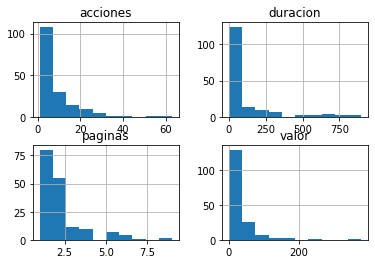

In [11]:
dataframe.drop(['clase'],1).hist()
plt.show()

Ademas se ueden interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistemas Operativo Windows en azul, Macintosh en verde y Linux en rojo.

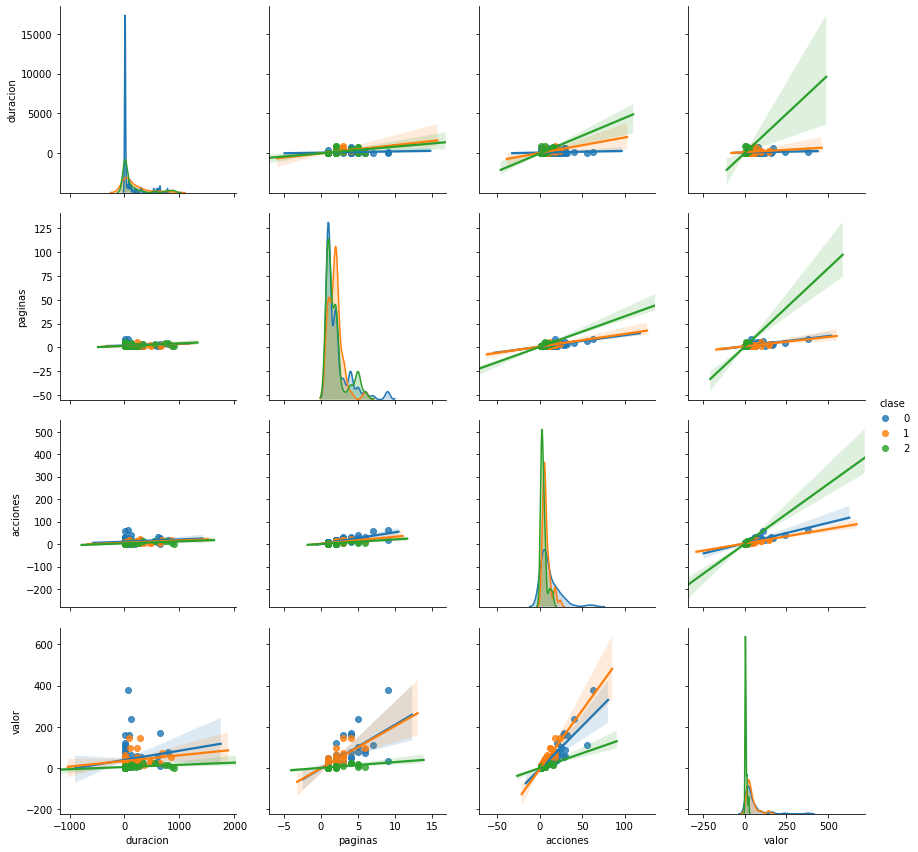

In [12]:
sb.pairplot(dataframe.dropna(), hue='clase', height=3, vars=["duracion","paginas", "acciones", "valor"], kind='reg')

## Se establece el modelo R Log 

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna "clase" con el método drop(). La columna "CLase"se agrega al atributo y. Se ejecuta X.shape para comprobar la dimension de la matriz con los datos de entrada 170 registros por 4 columnas

In [18]:
X= np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunot de entrada X y salidas 'y'.


In [ ]:
model = linear_model.LogistcRegression()
model.fit(X,y)

Una vez compilado el modelo, se clasifica todo el conjunto de entradas X utilizando el metodo "Predict(x)". Se se revisan alguns de sus salidas se puede ver vomo coincide con las salidas reales del archivo csv.

In [ ]:
predictions = model.predict(X)
print(predictions[0:5])

Y se confiram el desempeño del modelo utilizando model.score() el cuál devuelve la precision media de las predicciones, para este caso del 77%